# MOLECULE DRAWING DEMO

In [ ]:
from mlchem.chem.manipulation import (create_molecule,
                                      PatternRecognition as PR,
                                      PropManager as PM)
from mlchem.chem.visualise.drawing import MolDrawer
from mlchem.chem.calculator.tools import calc_centroid
import numpy as np


### test palette

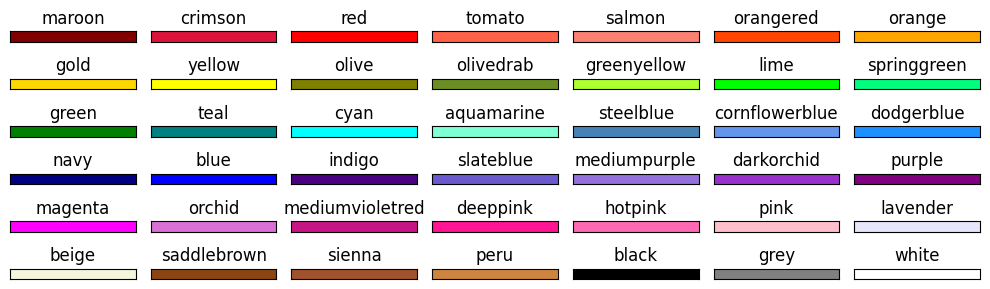

In [3]:
from mlchem.chem.visualise.drawing import MolDrawer
drawer = MolDrawer()
drawer.show_palette()

## draw a molecule

### Default style

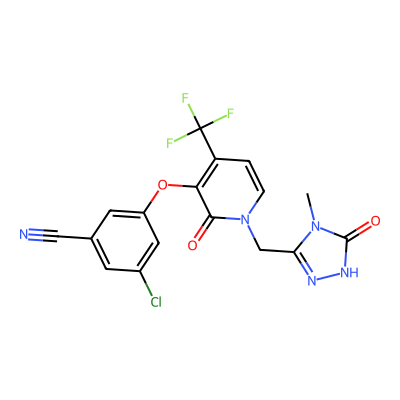

In [4]:
drawer = MolDrawer(size=(400,400))     # instantiate predefinite canvas size
doravirine = create_molecule('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
drawer.draw_mol(doravirine)

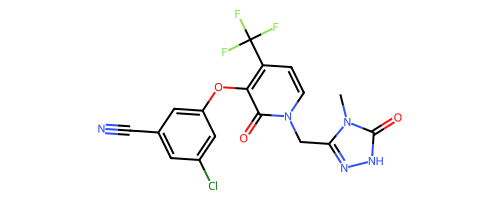

In [5]:
doravirine = create_molecule('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
drawer.draw_mol(doravirine,size=(500,200))     # overwrite predefined canvas size

### Use different styles

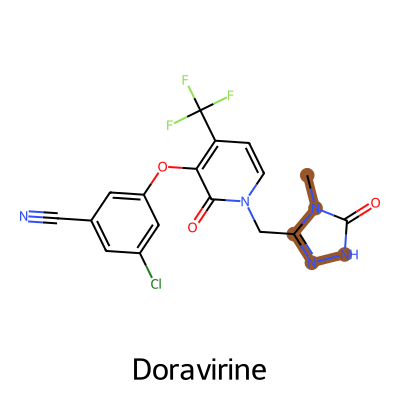

In [6]:
drawer.update_drawing_options(highlightColour='saddlebrown',highlightAlpha=0.9,legendFontSize=30,atomPalette='cdk')
drawer.draw_mol(doravirine,highlightAtoms=[0,1,2,3,4],legend='Doravirine')

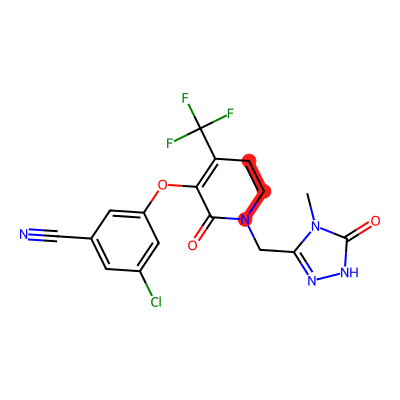

In [7]:
drawer.reset_drawing_options()
drawer.update_drawing_options(highlightColour='red',highlightAlpha=0.9,legendFontSize=25,atomPalette='avalon')
drawer.draw_mol(doravirine,highlightAtoms=[8,9,10])

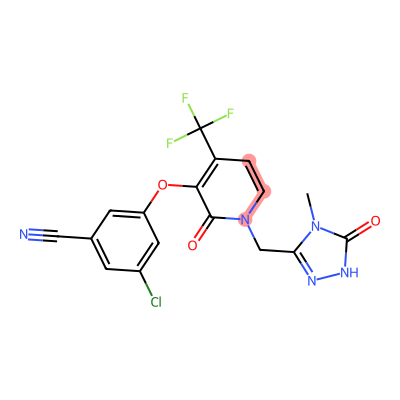

In [8]:
drawer.reset_drawing_options()
drawer.update_drawing_options(highlightColour='red',highlightAlpha=0.4,legendFontSize=25,atomPalette='cdk')
drawer.draw_mol(doravirine,highlightAtoms=[8,9,10])

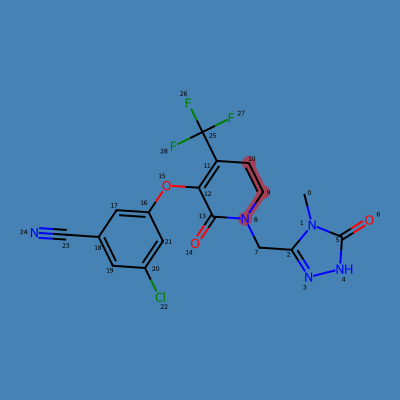

In [9]:
drawer.reset_drawing_options()
PM.Base.assign_atom_notes(doravirine)
drawer.update_drawing_options(highlightColour='red',highlightAlpha=0.5,legendFontSize=25,atomPalette='avalon',backgroundColour='steelblue')
drawer.draw_mol(doravirine,highlightAtoms=[8,9,10])

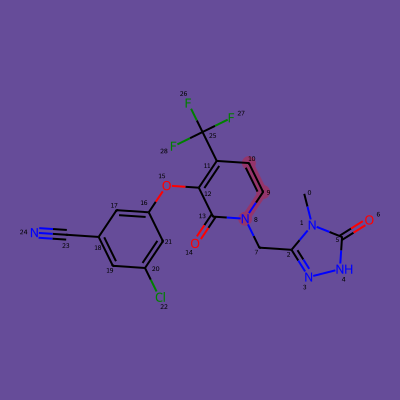

In [10]:
drawer.reset_drawing_options()
PM.Base.clear_all_atomprops(doravirine) # delete atom notes
PM.Base.assign_atom_notes(doravirine)
drawer.update_drawing_options(highlightColour='red',highlightAlpha=0.3,legendFontSize=25,atomPalette='avalon',backgroundColour=(0.4,0.3,0.6))
drawer.draw_mol(doravirine,highlightAtoms=[8,9,10])

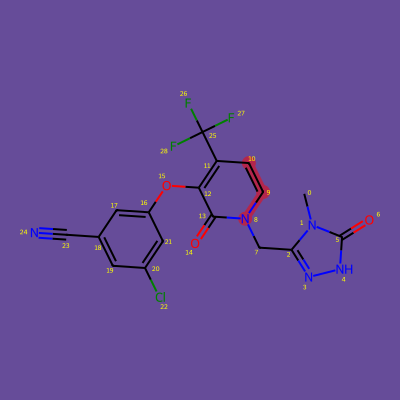

In [11]:
drawer.reset_drawing_options()
PM.Base.clear_all_atomprops(doravirine) # delete atom notes

PM.Base.assign_atom_notes(doravirine)
drawer.update_drawing_options(highlightColour='red',highlightAlpha=0.5,legendFontSize=25,atomPalette='avalon',backgroundColour=(0.4,0.3,0.6),annotationColour='yellow')
drawer.draw_mol(doravirine,highlightAtoms=[8,9,10])

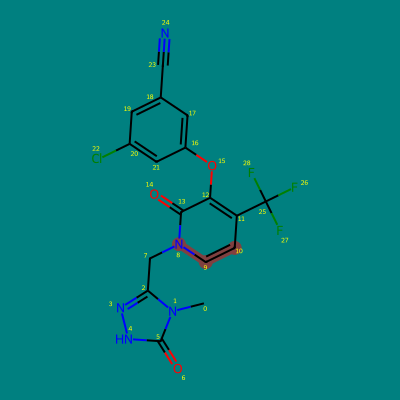

In [12]:
# if we don't reset drawing options, it's sufficient to add only the arguments we need when drawing again

drawer.update_drawing_options(rotate=90,backgroundColour='teal')
drawer.draw_mol(doravirine,highlightAtoms=[8,9,10])

## Mix different styles in an image grid

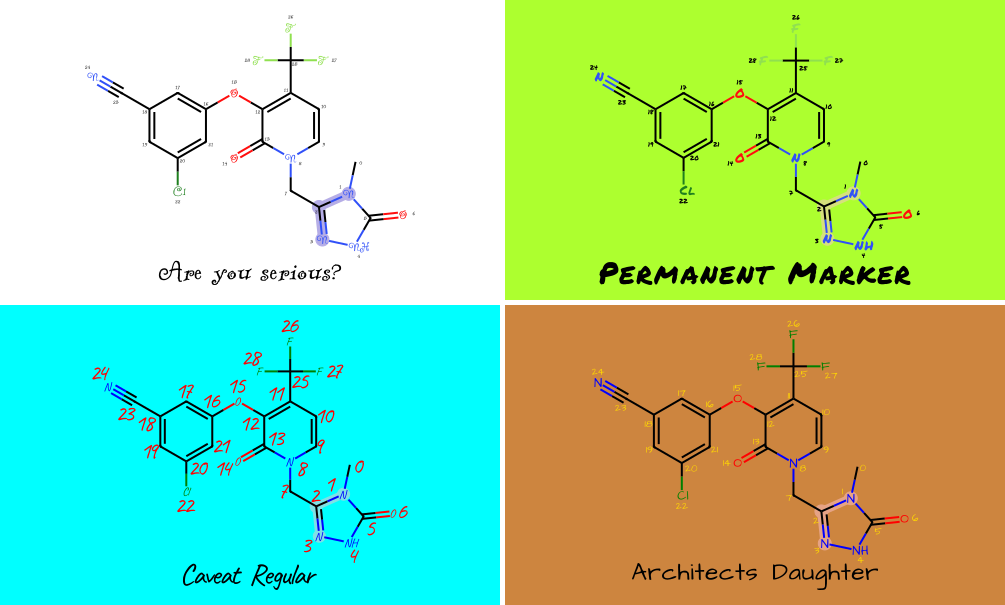

In [12]:
from mlchem.chem.manipulation import (create_molecule,
                                      PropManager as PM)
from mlchem.chem.visualise.drawing import MolDrawer
path_fontfile = './fonts/'
doravirine = create_molecule('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
PM.Conformation.straighten_mol_2d(doravirine)

drawer = MolDrawer(size=(500,300),highlightAtoms=[1,2,3])
PM.Base.assign_atom_notes(doravirine)
drawer.update_drawing_options(highlightColour='slateblue',highlightAlpha=0.5,legendFontSize=30,atomPalette='cdk',
                              fontFile=path_fontfile+"AreYouSerious-Regular.ttf")
img1 = drawer.draw_mol(doravirine,legend='Are you serious?')
#drawer.reset_drawing_options()
drawer.update_drawing_options(backgroundColour='greenyellow',highlightColour='pink',
                              fontFile=path_fontfile+"PermanentMarker-Regular.ttf")
img2 = drawer.draw_mol(doravirine,legend='Permanent Marker')
drawer.update_drawing_options(bondLineWidth=2,annotationFontScale=2,annotationColour='red',
                              backgroundColour='cyan',atomPalette='avalon',
                              fontFile=path_fontfile+'Caveat-Regular.ttf')
img3 = drawer.draw_mol(doravirine,legend='Caveat Regular')
drawer.update_drawing_options(addStereoAnnotation=True,annotationFontScale=0.8,
                              annotationColour='gold',backgroundColour='peru',
                              fontFile=path_fontfile+"ArchitectsDaughter-Regular.ttf")
img4 = drawer.draw_mol(doravirine,legend='Architects Daughter')

drawer.show_images_grid(images=[img1,img2,img3,img4],
                        n_columns=2,save=False,filename='test.png') # set save=True to save image

## ACS Style

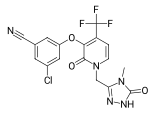

In [14]:
PM.Base.clear_all_atomprops(doravirine)
drawer.reset_drawing_options()
drawer.draw_mol(mol=doravirine,ACS1996_mode=True)

## Atomic Weights

### rdkit already has this function, but it does not create an image to keep drawing on unless a previous drawing is provided

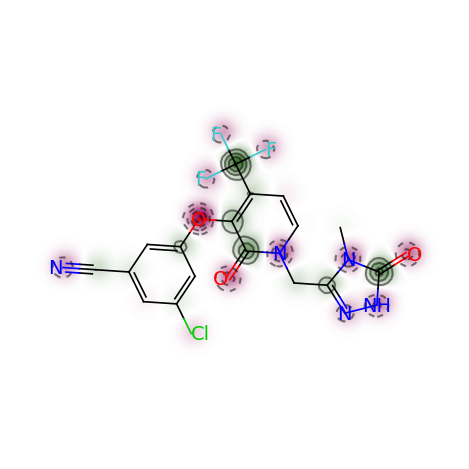

In [13]:
from mlchem.chem.manipulation import (create_molecule,
                                      PropManager as PM)
from rdkit.Chem.Draw import SimilarityMaps

doravirine = create_molecule('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
doravirine_atoms = PatternRecognition.Base.count_atoms(doravirine)

# atomic charges
GCharges = PM.Mol.get_gasteiger_charges(doravirine)
image = SimilarityMaps.GetSimilarityMapFromWeights(doravirine,GCharges,size=(180,180))

### mlchem version

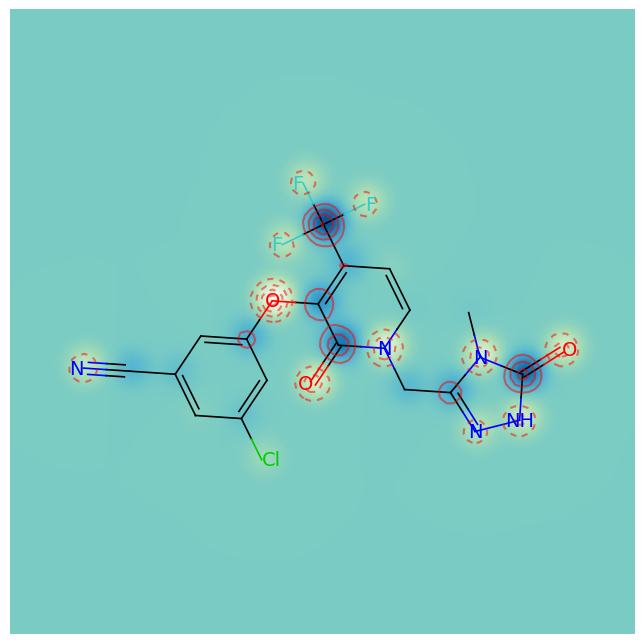

In [ ]:
from mlchem.chem.manipulation import (create_molecule,
                                      PropManager as PM)
from mlchem.chem.visualise.simmaps import SimMaps as SM
from mlchem.chem.visualise.drawing import MolDrawer

doravirine = create_molecule('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')

# atomic charges
GCharges = PM.Mol.get_gasteiger_charges(doravirine)
img = SM.get_similarity_map_from_weights(doravirine,GCharges,colorMap='GnBu',contourLines=10,contour_colour='red')

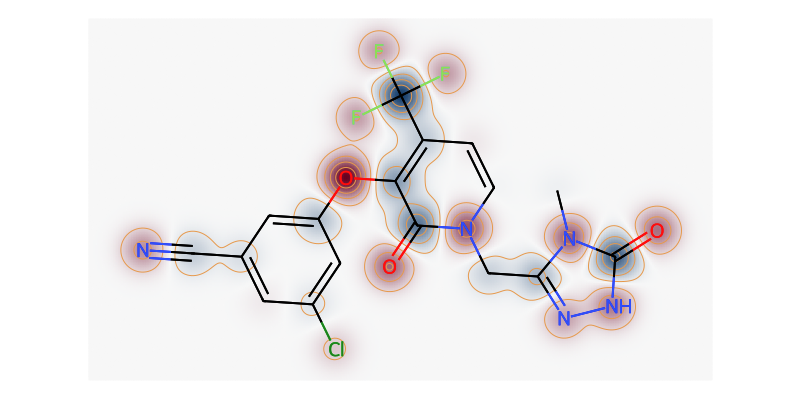

In [7]:
doravirine = create_molecule('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
drawer = MolDrawer(size=(800,400))
# drwaw regular molecule
drawer.update_drawing_options(atomWeights=GCharges,mapStyle='GC',contourColour=(0.9,0.6,0.3),dashNegative=False,colourMap='RdBu')
drawer.draw_mol(doravirine,legend='',)

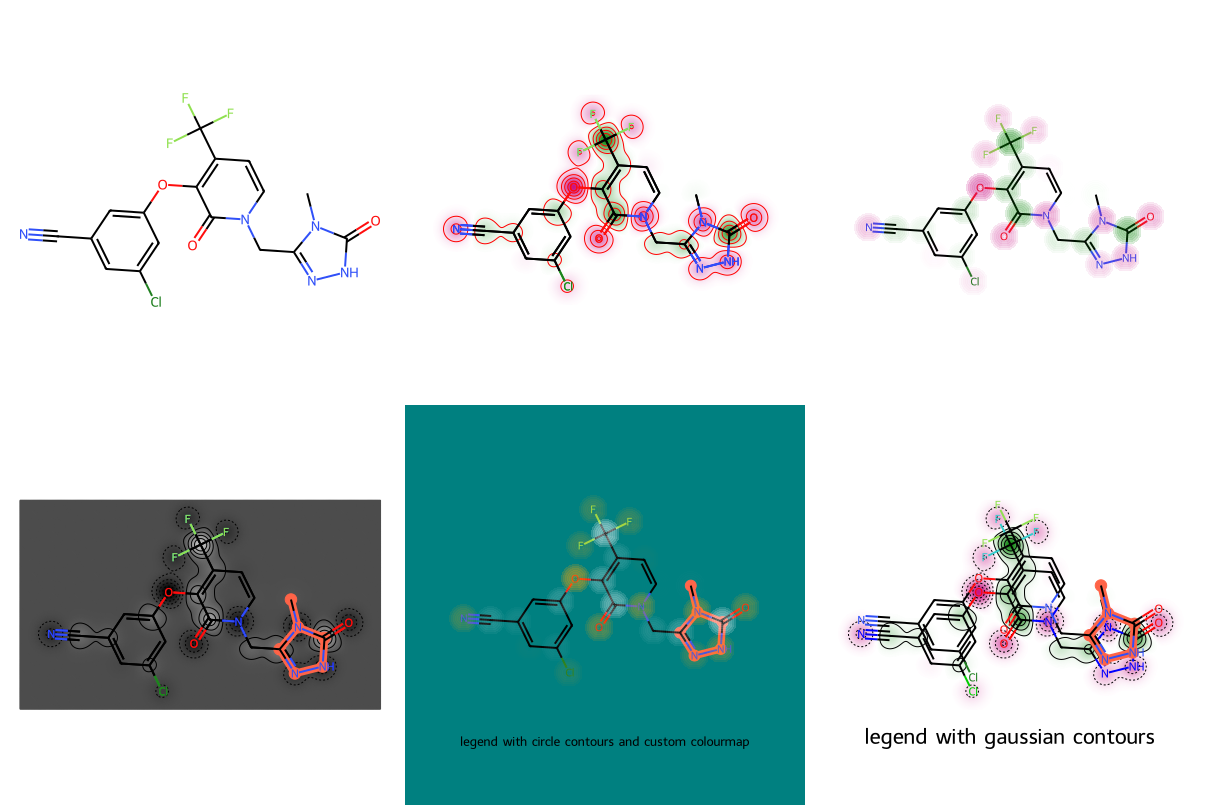

: 

In [ ]:
# KNOWN BUG:
# Adding legends to drawing when creating gaussian atomic contours will render the molecule twice.
# Circle contours do not show this problem thus consider using mapStyle='C' if legend is important at this stage.
# Otherwise add legend at any other time via other image-processing software.
doravirine = create_molecule('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
drawer = MolDrawer(size=(400,400))
# drwaw regular molecule
drawer.reset_drawing_options()    
img1 = drawer.draw_mol(doravirine,legend='')
# gaussian contours to represent weights
drawer.reset_drawing_options()
drawer.update_drawing_options(atomWeights=GCharges,mapStyle='GC',contourWidth=1,dashNegative=False,
                              contourColour='red')
img2 = drawer.draw_mol(doravirine,legend='')
# circles to represent weights
drawer.reset_drawing_options()
drawer.update_drawing_options(atomWeights=GCharges,mapStyle='C',numContours=7)
img3 = drawer.draw_mol(doravirine,legend='')
# customise drawing further
drawer.reset_drawing_options()
drawer.update_drawing_options(atomWeights=GCharges,colourMap=[(0,0,0),(0.3,0.3,0.3),(0.8,0.8,0.8)])
img4 = drawer.draw_mol(doravirine,legend='',highlightAtoms=[0,1,2,3,4,5])
# adding legend when circle contours are present **will not** disrupt rendering
drawer.reset_drawing_options()
drawer.update_drawing_options(atomWeights=GCharges,mapStyle='C')
drawer.update_drawing_options(backgroundColour='teal',positiveColour='white',negativeColour='orange',
                              numContours=7)
img5 = drawer.draw_mol(doravirine,legend='legend with circle contours and custom colourmap',
                       highlightAtoms=[0,1,2,3,4,5])
# adding legend when gaussian contours are present will disrupt rendering
drawer.reset_drawing_options()
drawer.update_drawing_options(mapStyle='GC',atomWeights=GCharges)
img6 = drawer.draw_mol(doravirine,legend='legend with gaussian contours',highlightAtoms=[0,1,2,3,4,5])

drawer.show_images_grid(images=[img1,img2,img3,img4,img5,img6],n_columns=3)

## Display custom shapes

#### Locate molecule centroid 

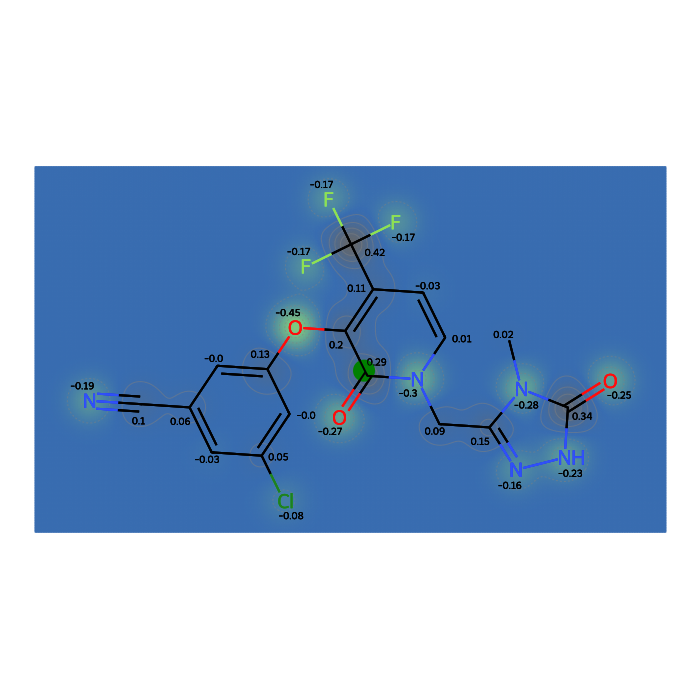

In [ ]:
drawer = MolDrawer(size=(700,700))
doravirine = create_molecule('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')

PM.Base.assign_atom_notes(doravirine,np.round(PM.Mol.get_gasteiger_charges(doravirine),2))
drawer.update_drawing_options(atomWeights=PM.Mol.get_gasteiger_charges(doravirine),negativeColour='blue',positiveColour='red')

drawer.update_drawing_options(shapeTypes=['circle'],shapeSizes=[0.3],shapeColours=[('green',1)],shapeCoords=[calc_centroid(PM.Mol.get_coordinates(doravirine))])
drawer.update_drawing_options(colourMap='Accent')
img = drawer.draw_mol(doravirine)
img

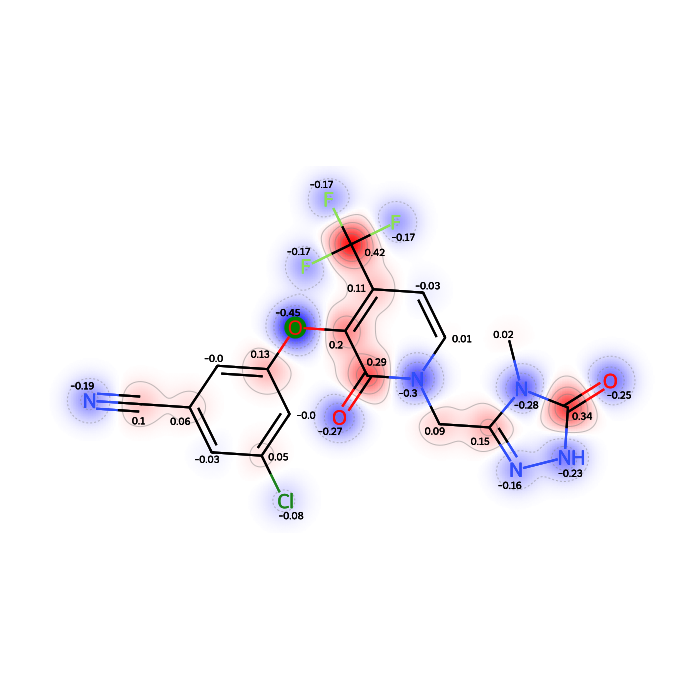

In [ ]:
drawer = MolDrawer(size=(700,700))
doravirine = create_molecule('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')

desired_atom_index = np.argmin(PM.Mol.get_gasteiger_charges(doravirine))
desired_coords = PM.Mol.get_coordinates(doravirine)[desired_atom_index]

PM.Base.assign_atom_notes(doravirine,np.round(PM.Mol.get_gasteiger_charges(doravirine),2))
drawer.update_drawing_options(atomWeights=PM.Mol.get_gasteiger_charges(doravirine),negativeColour='blue',positiveColour='red')

img = drawer.draw_mol(doravirine)
img

#### Locate a certain atom (for example the most electronegative one)

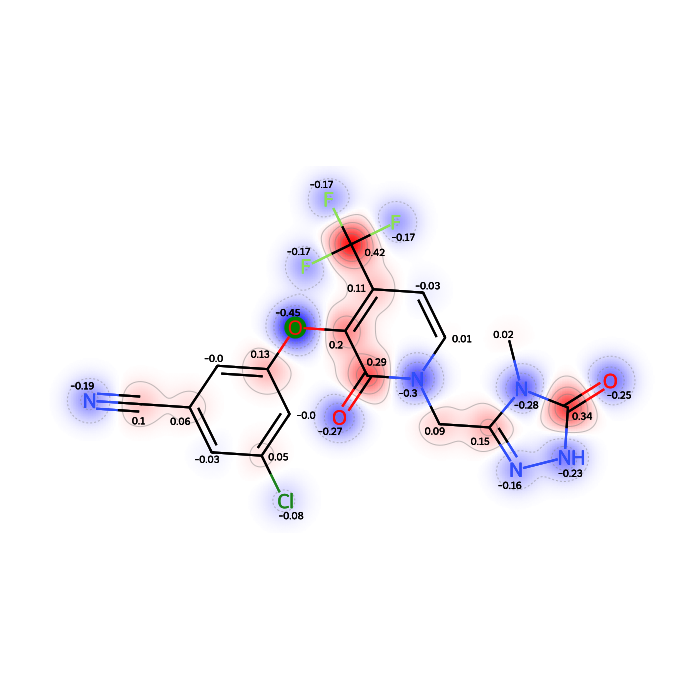

In [ ]:
drawer = MolDrawer(size=(700,700))
doravirine = create_molecule('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')

desired_atom_index = np.argmin(PM.Mol.get_gasteiger_charges(doravirine))
desired_coords = PM.Mol.get_coordinates(doravirine)[desired_atom_index]

PM.Base.assign_atom_notes(doravirine,np.round(PM.Mol.get_gasteiger_charges(doravirine),2))
drawer.update_drawing_options(atomWeights=PM.Mol.get_gasteiger_charges(doravirine),negativeColour='blue',positiveColour='red')

drawer.update_drawing_options(shapeTypes=['circle'],shapeSizes=[0.3],shapeColours=[('green',1)],shapeCoords=[desired_coords])
img = drawer.draw_mol(doravirine)
img